In [ ]:
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#Carregar o modelo
from keras.models import load_model
#salvar/carregar arquivos em diferentes formatos
import joblib

In [ ]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_maior_erro = load_model('./../../results/model__3T3_regressao_Maior_erro_Mean_squared_error_500_epochs_2022-6-30.h5')
modelo_maior_erro

In [ ]:
#84 IMAGENS SEPARADAS RANDOMICAMENTE - 40% TESTE - 208 IMAGENS

X_test_maior_erro = joblib.load('./../../results/6_images_de_X_test_3T3_PIOR_modelo_500_epochs2022-6-30.gz') #carregando arquivo
X_test_maior_erro.shape

(71, 200, 200, 3)

In [ ]:
#84 RÓTULOS

y_test_maior_erro = joblib.load('./../../results/6_images_de_y_test_3T3_PIOR_modelo_500_epochs2022-6-30.gz') #carregando arquivo
y_test_maior_erro.shape

(71,)

In [ ]:
#ROTULOS SALVOS EM LISTA

lista_observado_maior_erro = list(y_test_maior_erro)
len(lista_observado_maior_erro)

71

In [ ]:
#PREDIÇÃO SALVO EM LISTA

dados_prev = modelo_maior_erro.predict(X_test_maior_erro)
lista_previsto_maior_erro = dados_prev.flatten().tolist()
len(lista_previsto_maior_erro)

71

In [ ]:
import pandas as pd
from scipy.stats.stats import pearsonr as stats

In [ ]:
#DATAFRAME - ORGANIZAÇÃO DAS LISTAS
#COLUNA 1 ROTULO/ COLUNA 2 PREDITO

df_maior_erro = pd.DataFrame(zip(lista_observado_maior_erro,lista_previsto_maior_erro), 
                             columns = ['Observed values','Lista preditos'])
df_maior_erro.head()

,Observed values,Lista preditos
0,610,235.107071
1,807,232.754639
2,734,237.473526
3,28,264.594910
4,259,216.330063


In [ ]:
#ARREDONDANDO O PREDITO ('lista preditos')

teste = round(df_maior_erro['Lista preditos'],2)
df_maior_erro['Predicted values'] = teste
df_maior_erro.head()

,Observed values,Lista preditos,Predicted values
0,610,235.107071,235.11
1,807,232.754639,232.75
2,734,237.473526,237.47
3,28,264.594910,264.59
4,259,216.330063,216.33


In [ ]:
#REORGANIZANDO AS COLUNAS

df_maior_erro = df_maior_erro.reindex(columns=['Observed values','Predicted values','Lista preditos'])
df_maior_erro.head()

,Observed values,Predicted values,Lista preditos
0,610,235.11,235.107071
1,807,232.75,232.754639
2,734,237.47,237.473526
3,28,264.59,264.594910
4,259,216.33,216.330063


In [ ]:
#BIBLIOTECA CORRELAÇÃO
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação

In [ ]:
#CALCULO DE CORRELAÇÃO

col1_obt = 0 #Observed value
col2_prev = 1 #Predicted values
pear_pos_maior_erro = stats(df_maior_erro[df_maior_erro.columns[col1_obt]], 
                            df_maior_erro[df_maior_erro.columns[col2_prev]])

<Figure size 1080x1080 with 0 Axes>

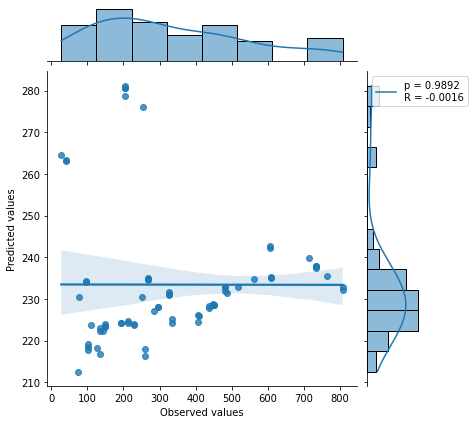

In [ ]:
plt.figure(figsize=(15,15))
sns.jointplot(
    x=df_maior_erro.columns[col1_obt],
    y=df_maior_erro.columns[col2_prev],
    kind='reg',
    data=df_maior_erro#[df_maior_erro['Lista observado'] > 300]
)

if pear_pos_maior_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(round(pear_pos_maior_erro[1],4)) + '\nR = ' + str(round(pear_pos_maior_erro[0], 4))]) #calculando p e r